## Data Exploration

In [14]:
import pandas as pd

# Load the dataset

train_df = pd.read_csv('./data/train.csv')

# Perform basic summary of the dataset
summary = train_df.describe(include='all')

# Check for missing values
missing_values = train_df.isnull().sum()

# Check for duplicates
duplicates = train_df.duplicated().sum()

# Identifying categorical and numerical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_df.select_dtypes(include=['number']).columns.tolist()

# Check for anomalies by identifying columns with extreme values (outliers)
anomalies = train_df[numerical_features].apply(lambda x: (x < x.quantile(0.01)) | (x > x.quantile(0.99))).sum()

# Display results
summary, missing_values, duplicates, categorical_features, numerical_features, anomalies

(                   id   brand      model     model_year         milage  \
 count   188533.000000  188533     188533  188533.000000  188533.000000   
 unique            NaN      57       1897            NaN            NaN   
 top               NaN    Ford  F-150 XLT            NaN            NaN   
 freq              NaN   23088       2945            NaN            NaN   
 mean     94266.000000     NaN        NaN    2015.829998   65705.295174   
 std      54424.933488     NaN        NaN       5.660967   49798.158076   
 min          0.000000     NaN        NaN    1974.000000     100.000000   
 25%      47133.000000     NaN        NaN    2013.000000   24115.000000   
 50%      94266.000000     NaN        NaN    2017.000000   57785.000000   
 75%     141399.000000     NaN        NaN    2020.000000   95400.000000   
 max     188532.000000     NaN        NaN    2024.000000  405000.000000   
 
        fuel_type                                        engine transmission  \
 count     183450 

In [15]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


### Initial Findings

Numerical:
- id: 188,533 total
- model_year ranges 1974-2024 with average model being 2015-2016
- mileage ranges 100-405,000 with average of 65,705.3 miles
- price ranges from $2,000 to $2,954,083 with average of $43,878 

Categorical:
- brand
- model
- fuel_type
- engine
- transmission
- ext_col (exterior color)
- int_col (interior color)
- accident
- clean_title

Missing Values: 
- fuel type: 5,083
- accident: 2,452 
- clean_title: 21,419 

Other:
- no duplicates
- look into potential outliers for: model_year, milage, price

## Data Visualization

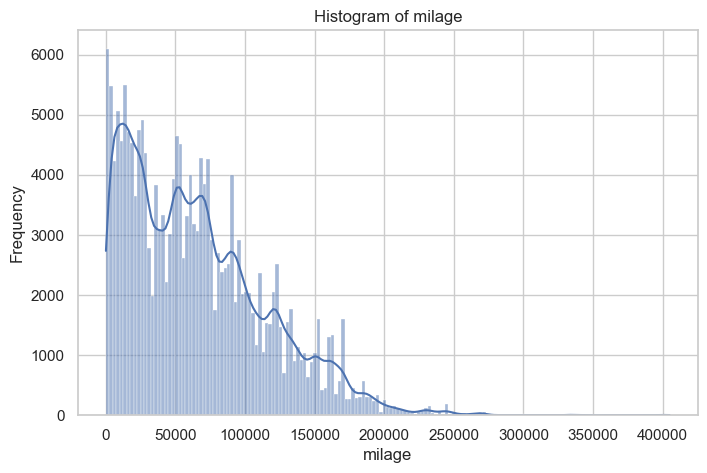

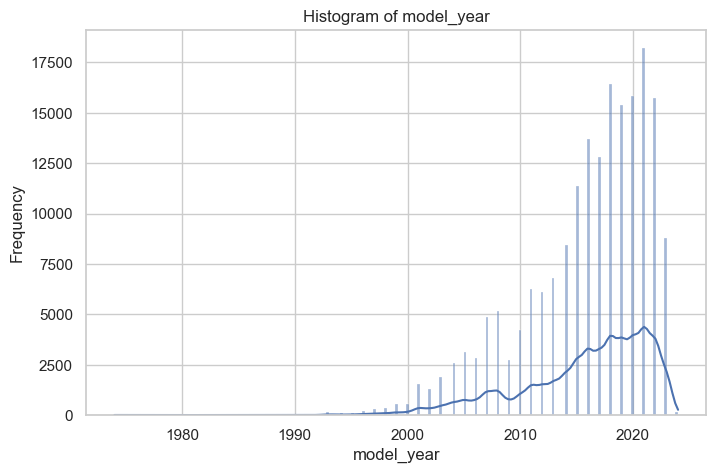

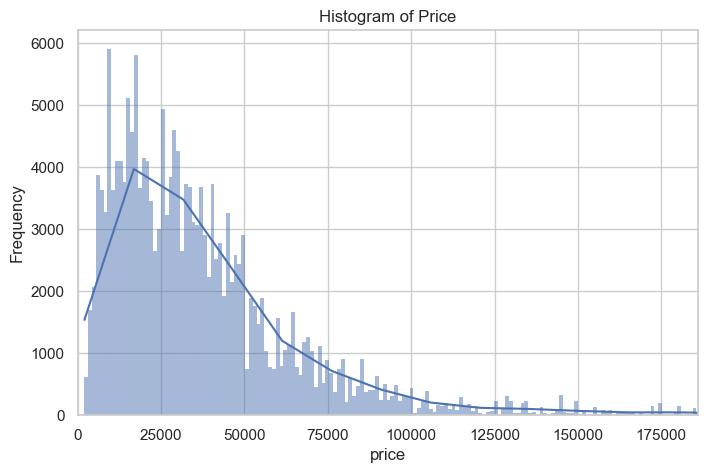

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for seaborn
sns.set(style="whitegrid")

# 1. Univariate analysis: Histograms for continuous variables (including price)
numerical_features = ['milage','model_year']

# Plot individual histograms for continuous variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# plotting price separately to make the distribution more visible
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], kde=True)
plt.xlim(0, data['price'].quantile(0.98))  # Zoom in on 98th percentile of the price range
plt.title('Histogram of Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()



- milage: right skewed
- model_year: left skewed
- price: right skewed

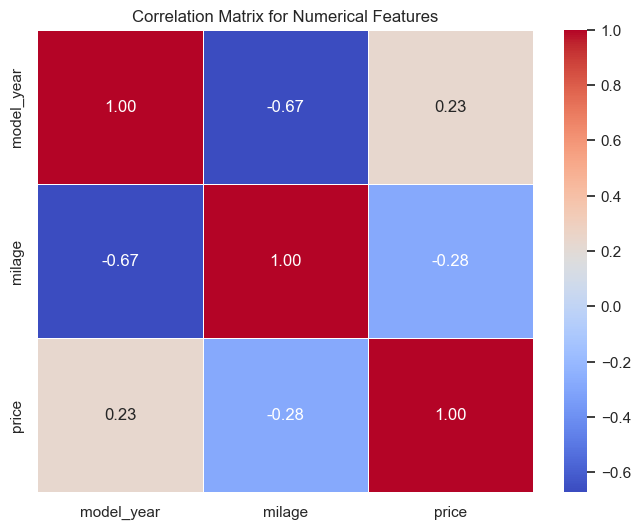

In [20]:
# 2. Correlation matrix for numerical variables
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

- Model Year vs Milage
    - strong negative correlation suggests newer vehicles have lower milage- intuitive
- Milage vs Price
    - moderate negative correlation suggests cars with higher mileage are associated with lower prices as expected
- Model Year vs Price
    - weak to moderate correlation suggests newer vehicles tend to have higher price. Not a strong relationship because price is influenced by many other factors.

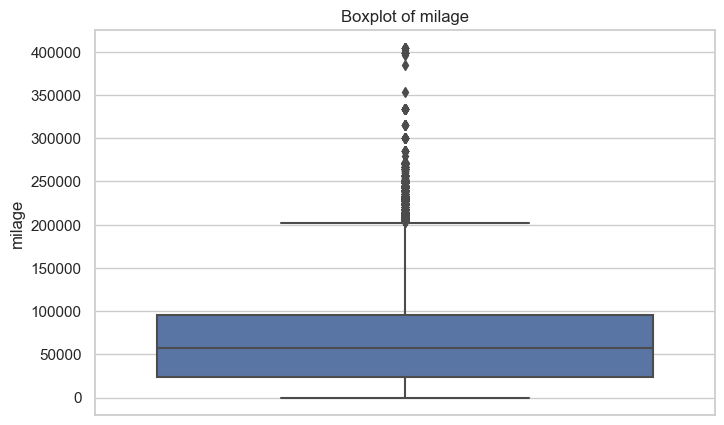

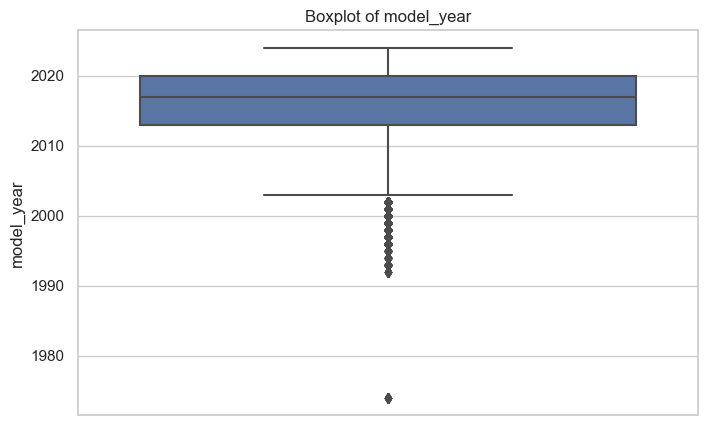

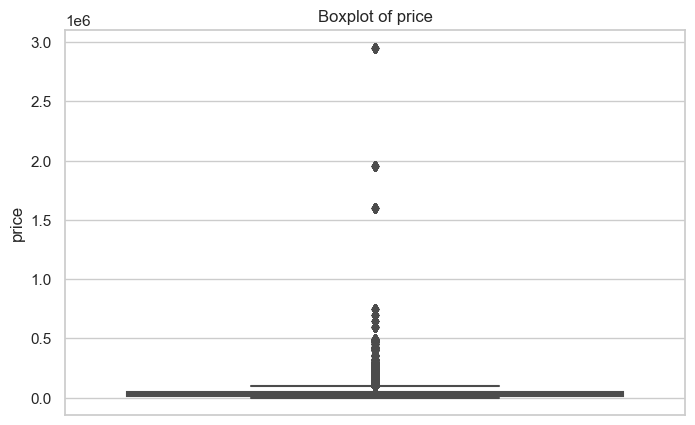

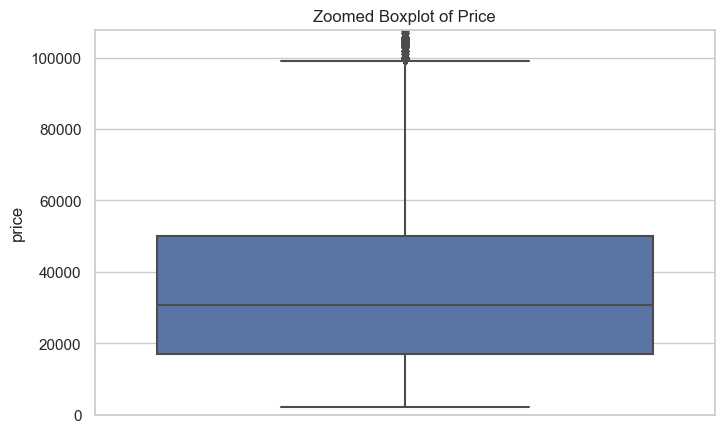

In [36]:
# 3. Visualizing outliers with box plots for continuous variables

numerical_features = ['milage','model_year', 'price']

# Visualizing outliers with vertical box plots for continuous variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data[feature])  # Changing to vertical orientation
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

# price is separated to zoom in on the 95th percentile
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['price'])
plt.ylim(0, data['price'].quantile(0.95))  # Zoom in to the 95th percentile of price to remove extreme outliers
plt.title('Zoomed Boxplot of Price')
plt.ylabel('price')
plt.show()


- model_year:
    - narrow interquartile range indicates that the middle 50% if vehicles are concentrated within a small range of years ~2010-2020
    - number of older vehicles appear to be outliers extending from the early 2000s to the 1970s
    - oldest car sold in 1973ish
    
- mileage:
    - IQR lies between approximately 20,000 to 100,000 miles, which suggests that most vehicles in this dataset have mileage within this range.
    - considerable number of high-mileage outliers, with some vehicles having up to 400,000 miles.

- price:
    - IQR shows that the middle 50% of vehicle prices fall between approximately $18,000 and $50,000
    - outliers are vehicles more expensive than $100k
    - most expensive cars sold for around $3 million, some for $2 and $1.6 million and then a decent spread of outliers sold from $100k to $750k

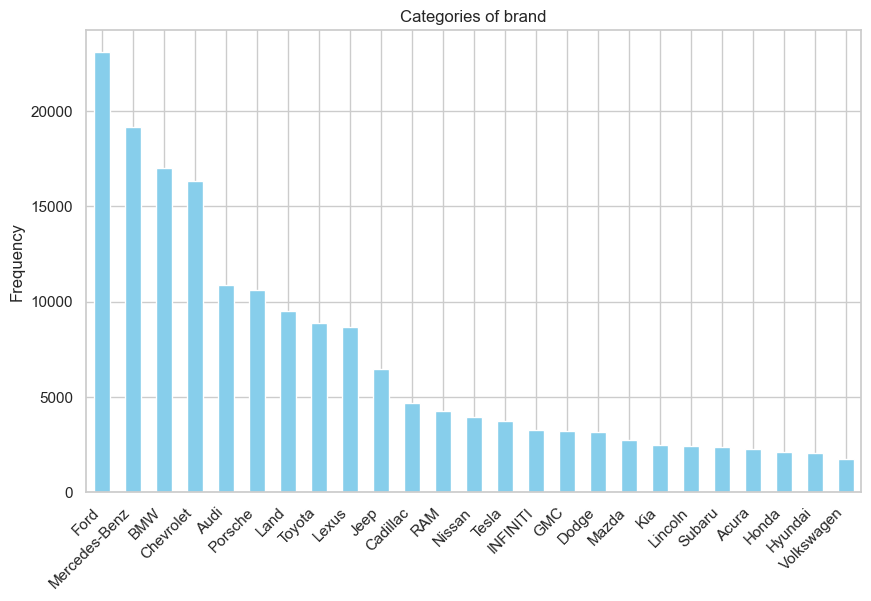

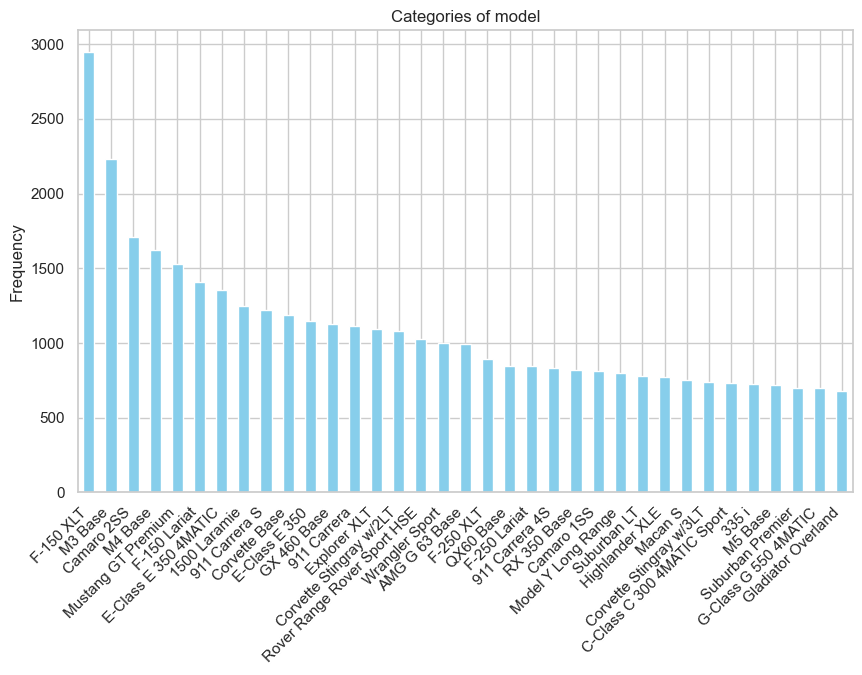

In [49]:
# Visualizing the distribution of categorical variables using bar plots

# brands
plt.figure(figsize=(10, 6))
data['brand'].value_counts().nlargest(25).plot(kind='bar', color='skyblue')
plt.title(f'Categories of brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# models
plt.figure(figsize=(10, 6))
data['model'].value_counts().nlargest(35).plot(kind='bar', color='skyblue')
plt.title(f'Categories of model')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

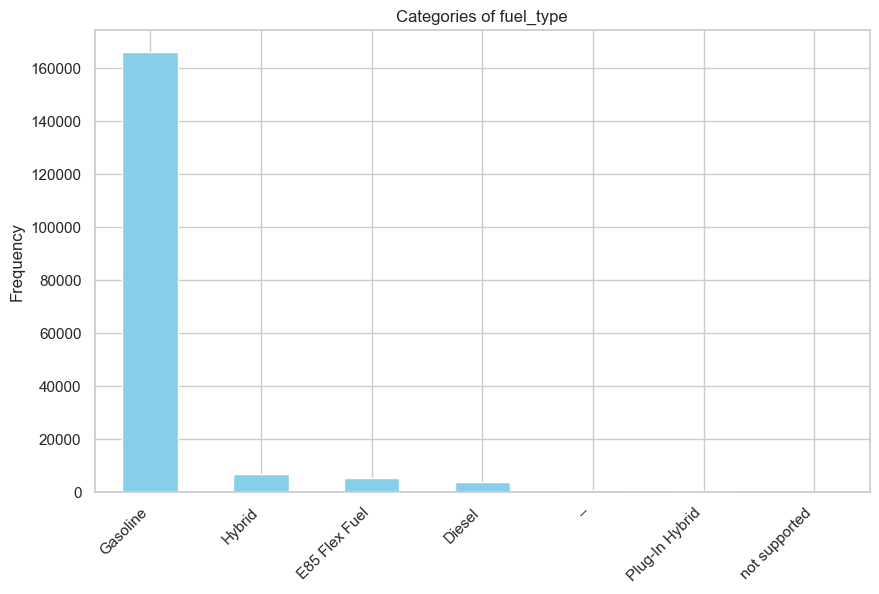

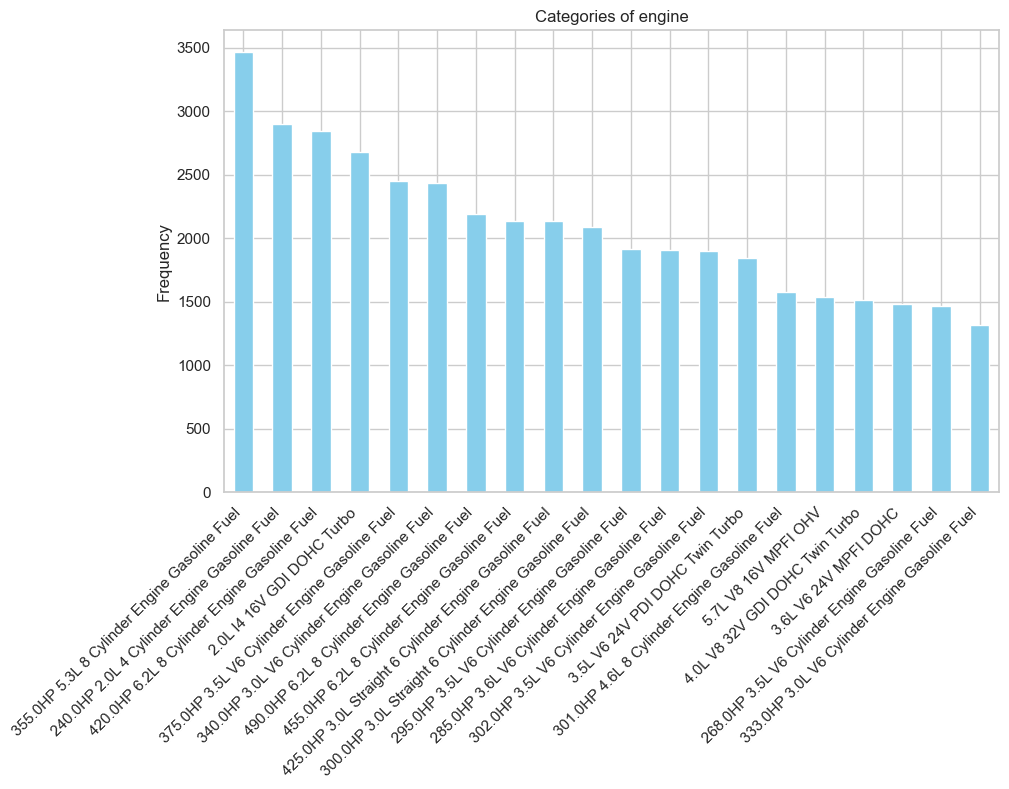

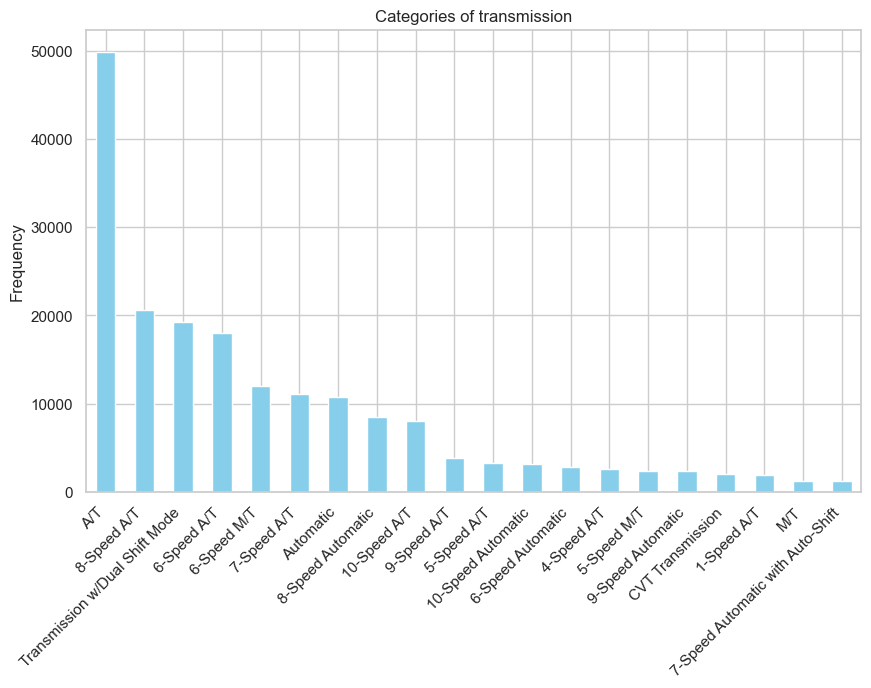

In [54]:
# fuel type
plt.figure(figsize=(10, 6))
data['fuel_type'].value_counts().nlargest(7).plot(kind='bar', color='skyblue')
plt.title(f'Categories of fuel_type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

categorical_features = ['transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
# engine
plt.figure(figsize=(10, 6))
data['engine'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of engine')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# transmission
plt.figure(figsize=(10, 6))
data['transmission'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of transmission')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

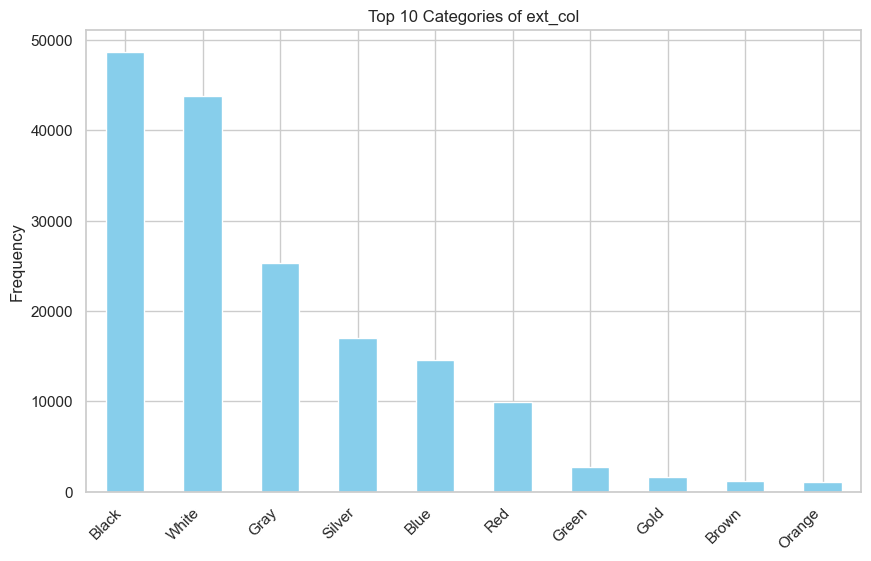

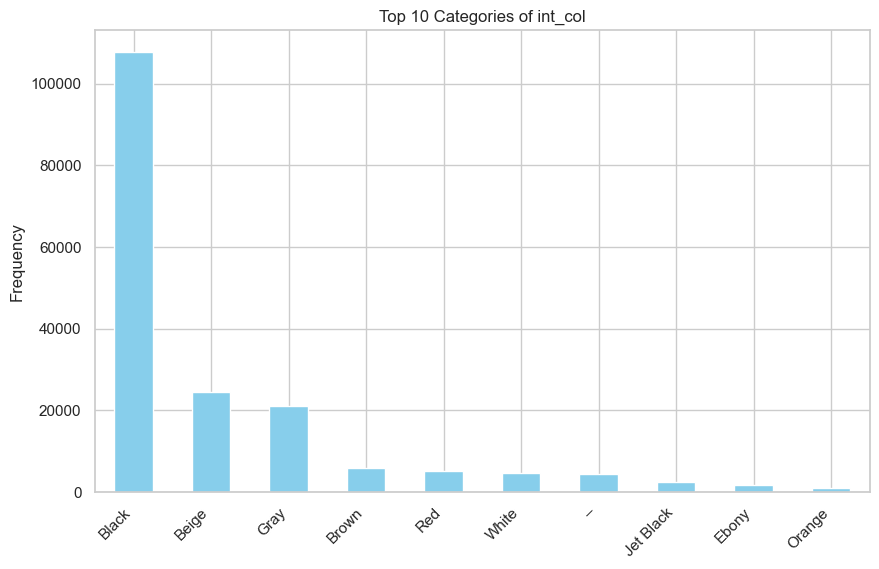

In [55]:
# exterior and interior colors
colors = ['ext_col', 'int_col']

for feature in colors:
    plt.figure(figsize=(10, 6))
    data[feature].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Categories of {feature}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

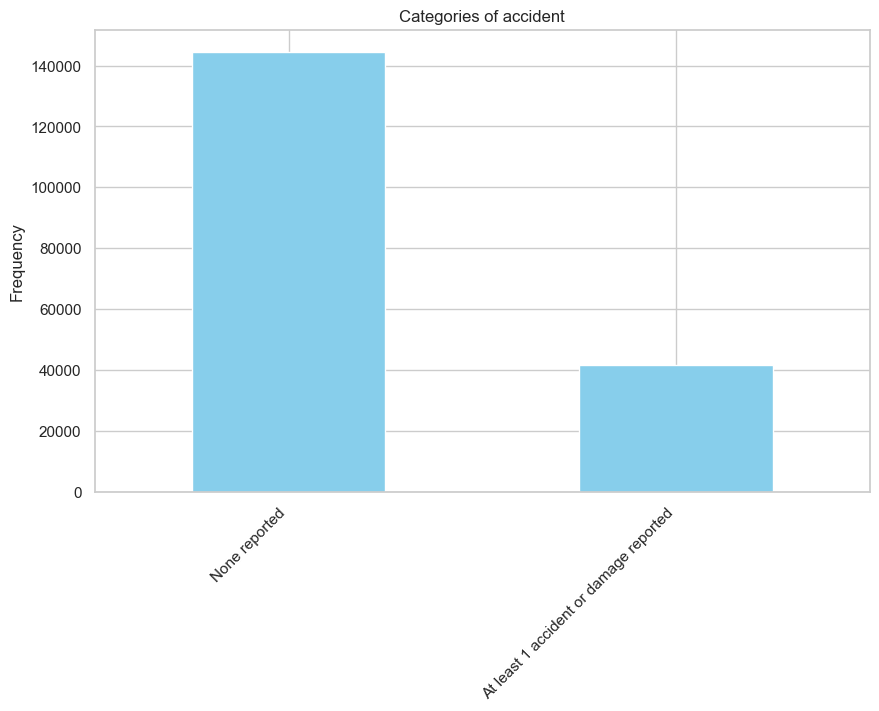

In [56]:
# accident
plt.figure(figsize=(10, 6))
data['accident'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of accident')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Key Observations

- Brand: 
    - The distribution shows that certain brands dominate the dataset, with Ford being the most frequent.
- Model: 
    - Among models, the Ford F-150 XLT stands out as the most frequent, followed by a variety of other models.
- Fuel Type: 
    - Gasoline is by far the most common fuel type, with other fuel types much less frequent.
- Engine: 
    - Certain engine configurations appear more frequently, though there is a wide variety overall.
- Transmission: 
    - The A/T transmission (Automatic) is dominant, with very few alternatives.
- Exterior Color: 
    - Black is the most common exterior color, followed by a few other popular colors like White and Silver.
- Interior Color: 
    - Black also leads among interior colors, with a large gap to the next most common colors.
- Accident: 
    - Most vehicles have "None reported" for accidents, indicating clean histories for the majority.